# Building a Digit Recognizer using CNN 

This is a tutorial on developing a digit recognizer using CNN and MNIST Data.

## Define the problem 
The goal here is to correctly identify digits from a dataset of tens of thousands of handwritten images. The MNIST dataset is used for training and testing. 

Before going forward, the necessary modules need to be imported. 

In [1]:
# data analysis
import numpy as np 
import pandas as pd 

# visualization 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(style='white', context='notebook', palette='deep')

# machine learning 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
import itertools

#import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.callbacks import ReduceLROnPlateau 

# utils
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

## Acquire the data

The MNIST data can be loaded using Keras. 

In [2]:
# Load the data 
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

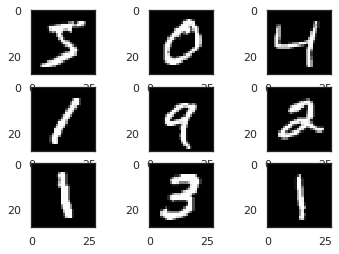

In [3]:
# Plot some examples
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'));

## Prepare the data

### Data Overview 

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


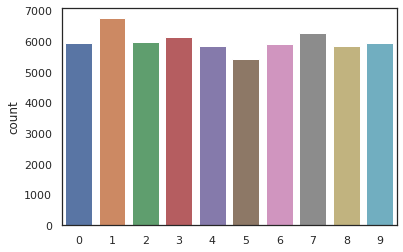

In [4]:
print('Train: X=%s, y=%s' %(X_train.shape, Y_train.shape))
print('Test: X=%s, y=%s' %(X_test.shape, Y_test.shape))
sns.countplot(Y_train);

The training dataset contains 60000 examples, while the test dataset contains 10000 exmpales. Each example is a 28x28 pixels figure.
In addition, we have simlar counts for the 10 digits.

### Normalization

In [5]:
# Normalize the data 
X_train = X_train / 255.0 
X_test = X_test / 255.0 

In [6]:
# Encode lables to one hot vectors (ex: 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)
Y_test = to_categorical(Y_test, num_classes = 10)

### Reshape the data 

In [7]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))  # X_train shape M (number of samples) x H (Height) x W (Width) x D (Depth)
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

### Split the dataset

In [8]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1)

## Define the model

We use the Keras API to build a Convolutional Neural Network model to reconginze the digits in the figures. 

In [9]:
# Set the CNN model 
# In -> Conv2D -> relu -> MaxPool2D -> Conv2D -> relu -> Conv2D -> relu -> MaxPool2D -> Flatten -> Dense -> Dense -> Out

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

#opt = Adam(lr=0.01)
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               1

## Train the model

In [11]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_val, Y_val), verbose =1)

Epoch 1/10
1688/1688 [==============================] - 28s 17ms/step - loss: 0.1299 - accuracy: 0.9596 - val_loss: 0.0488 - val_accuracy: 0.9850
Epoch 2/10
1688/1688 [==============================] - 34s 20ms/step - loss: 0.0460 - accuracy: 0.9857 - val_loss: 0.0464 - val_accuracy: 0.9853
Epoch 3/10
1688/1688 [==============================] - 28s 17ms/step - loss: 0.0300 - accuracy: 0.9904 - val_loss: 0.0392 - val_accuracy: 0.9885
Epoch 4/10
1688/1688 [==============================] - 28s 16ms/step - loss: 0.0231 - accuracy: 0.9928 - val_loss: 0.0359 - val_accuracy: 0.9902
Epoch 5/10
1688/1688 [==============================] - 27s 16ms/step - loss: 0.0170 - accuracy: 0.9944 - val_loss: 0.0332 - val_accuracy: 0.9892
Epoch 6/10
1688/1688 [==============================] - 27s 16ms/step - loss: 0.0139 - accuracy: 0.9950 - val_loss: 0.0333 - val_accuracy: 0.9900
Epoch 7/10
1688/1688 [==============================] - 29s 17ms/step - loss: 0.0089 - accuracy: 0.9970 - val_loss: 0.0382 -

The training accuracy is 0.9987, and the validation accuracy is 0.9918. 

In [12]:
# Save the model
model.save('cnn_model.h5')

## Evulate the model

In [13]:
# predict results
loss, accuracy = model.evaluate(X_test, Y_test, verbose=1)

313/313 [==============================] - 1s 4ms/step - loss: 0.0302 - accuracy: 0.9929


The accuracy on the test dataset is 0.9923.

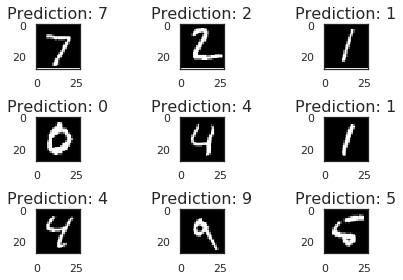

In [14]:
# Show the first few predictions
for i in range(9):
    ax = plt.subplot(3,3,i+1)
    results = model.predict(X_test[i:i+1,:,:,:])
    plt.tight_layout()
    predicted_digit = np.argmax(results, axis = 1)
    plt.imshow(X_test[i,:,:,0],cmap=plt.get_cmap('gray'));
    ax.set_title("Prediction: %s" %predicted_digit[0],fontsize=16)

## References 
This tutorial has been created based on great work done solving this digit recognizer problem.

1. [https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/](https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/)
2. [https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6](https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6)